In [108]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import fuzzy as fy
from collections import namedtuple
from collections import defaultdict
import numpy as np
from statsmodels.tsa.base.datetools import dates_from_str
from statsmodels.tsa.vector_ar.var_model import VAR
# import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels as sm

In [6]:
nat = pd.read_csv('NationalNames.csv')

In [7]:
samp = nat.sample(100000)

In [8]:
soundex = fy.Soundex(4)
samp['Soundex'] = samp.Name.apply(soundex)

In [9]:
samp['new_name'] = samp.Name.str.lower()

In [10]:
samp = samp.set_index(['Year'])

In [11]:
samp['sound_strip'] = samp.Soundex.map(lambda x: x.strip('0'))
samp['first_syl'] = samp.sound_strip.str[0]

In [12]:
# samp.pivot('first_syl', 'index', 'Count')
df_raw = pd.pivot_table(samp,'Count', samp.index,'first_syl', aggfunc=np.sum)

In [13]:
df = df_raw.drop(['Q','U','X','Y','Z'], axis=1)

In [14]:
df_subset = df[(df.index < 1910) & (df.index < 2000)]

In [16]:
pd.set_option('display.max_columns', 500)


In [17]:
data = np.log(df_subset).diff(16)

In [18]:
years = pd.date_range('1950-1-1', periods=40, freq='A-JAN')
data.index = years

ValueError: Length mismatch: Expected axis has 30 elements, new values have 40 elements

In [160]:
data = data.dropna()

In [161]:
model = VAR(data)

In [162]:
results = model.fit(2)
results.summary()

In [65]:
# ols_model = sm.OLS(data, sm.add_constant(data.index)).fit()

In [9]:
df_raw.head()

first_syl,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
Year,,,,,,,,,,,,,,,,,,,,,
1880,281.0,1083.0,241.0,61.0,2062.0,55.0,45.0,2823.0,169.0,729.0,...,NaN,343.0,59.0,39.0,NaN,42.0,42.0,NaN,NaN,10.0
1881,353.0,34.0,1655.0,28.0,135.0,109.0,NaN,213.0,47.0,82.0,...,NaN,483.0,258.0,2396.0,NaN,NaN,9.0,NaN,NaN,NaN
1882,181.0,58.0,1142.0,188.0,458.0,47.0,174.0,37.0,NaN,121.0,...,NaN,42.0,33.0,56.0,NaN,5.0,47.0,NaN,NaN,32.0
1883,903.0,1395.0,128.0,658.0,2857.0,12.0,111.0,76.0,153.0,547.0,...,NaN,21.0,121.0,NaN,14.0,355.0,127.0,NaN,NaN,6.0
1884,1188.0,426.0,83.0,944.0,1828.0,813.0,1254.0,255.0,109.0,485.0,...,NaN,1281.0,384.0,250.0,NaN,43.0,652.0,NaN,NaN,27.0


In [42]:
dfsound = df_raw.copy()

In [43]:
dfsound = dfsound.fillna(0)

In [44]:
dfsound['sound1'] = dfsound.B + dfsound.F + dfsound.P + dfsound.V

In [45]:
dfsound = dfsound.drop(['B','F','P','V'], axis=1)

In [46]:
dfsound['sound2'] = dfsound.C + dfsound.G + dfsound.J + dfsound.K + dfsound.Q + dfsound.S + dfsound.X + dfsound.Z

In [47]:
dfsound = dfsound.drop(['C','G','J','K','Q','S','X','Z'], axis=1)

In [48]:
dfsound['sound3'] = dfsound['D'] + dfsound['T']

In [49]:
dfsound = dfsound.drop(['D','T'], axis=1)

In [50]:
dfsound['sound4'] = dfsound.L
dfsound = dfsound.drop('L', axis=1)

In [51]:
dfsound['sound5'] = dfsound.M + dfsound.N
dfsound = dfsound.drop(['M','N'], axis=1)

In [52]:
dfsound['sound6'] = dfsound.R
dfsound = dfsound.drop('R', axis=1)

In [53]:
dfsound['soft_sound'] = dfsound.A + dfsound.E + dfsound.H + dfsound.I + dfsound.O + dfsound.U + dfsound.W + dfsound.Y

In [54]:
dfsound = dfsound.drop(['A','E','H','I','O','U','W','Y'], axis=1)

In [55]:
dfsound_50 = dfsound[(dfsound.index >= 1882) & (dfsound.index < 2010)]

In [58]:
years = pd.date_range('1880-1-1', periods=128, freq='A-JAN')

In [59]:
dfsound_50.index = years

In [60]:
sound_data = np.log(dfsound_50).diff()

In [61]:
sound_data = sound_data.dropna()

In [62]:
sound_data.head()

first_syl,sound1,sound2,sound3,sound4,sound5,sound6,soft_sound
1881-01-31 00:00:00,-0.584745,-0.438066,2.315657,0.088428,-0.720011,-1.979501,-0.763854
1882-01-31 00:00:00,-0.063220,-0.166080,-1.273430,-0.814661,-0.052075,2.967064,0.955676
1883-01-31 00:00:00,0.779196,1.341882,1.817715,-0.317689,1.913735,-0.162387,-0.102372
1884-01-31 00:00:00,1.019235,-0.818932,-3.566335,1.527608,-2.608187,0.317496,-0.946901
1885-01-31 00:00:00,-0.702164,0.329431,1.688865,-0.924533,0.965702,-1.809151,2.041954


In [63]:
sound_model = VAR(sound_data)

In [64]:
sound_results = sound_model.fit(2)

In [65]:
sound_results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 22, Jun, 2016
Time:                     20:12:04
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   0.542261
Nobs:                     125.000    HQIC:                 -0.868367
Log likelihood:          -1021.98    FPE:                   0.161155
AIC:                     -1.83352    Det(Omega_mle):       0.0728984
--------------------------------------------------------------------
Results for equation sound1
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.008950         0.070242            0.127           0.899
L1.sound1            -0.681362         0.081983           -8.311           0.000
L1.sound2             0.290580         0.104657            

In [66]:
# sound_results.plot_acorr()

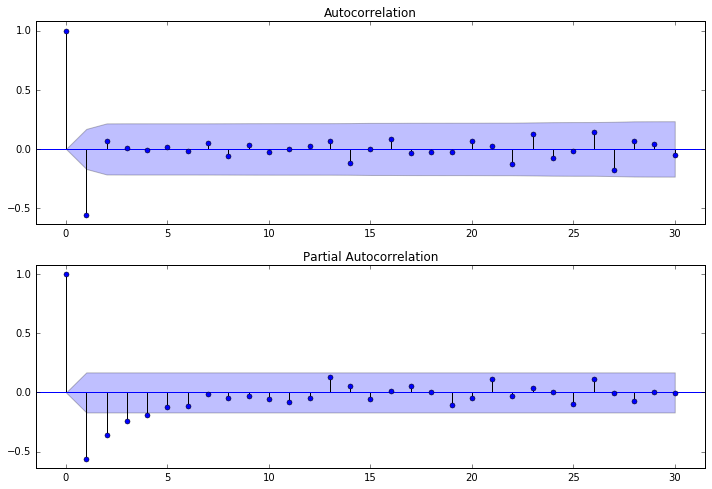

In [138]:
#Sound 1 figures

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sound_data.sound1, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sound_data.sound1, lags=30, ax=ax2)

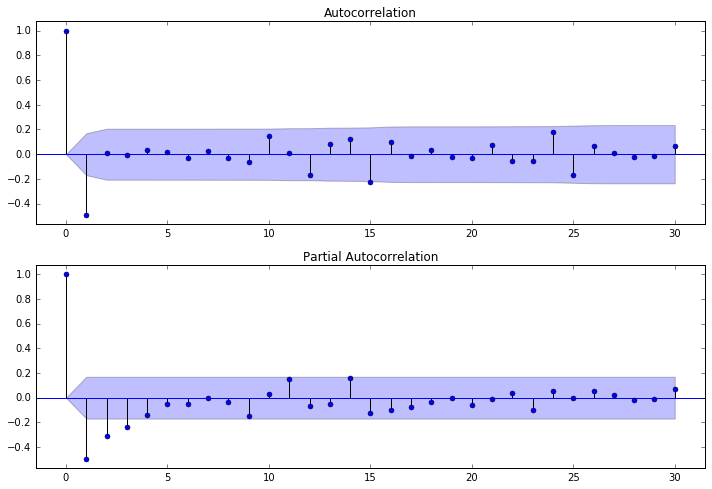

In [139]:
#Sound 2 figures

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sound_data.sound2, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sound_data.sound2, lags=30, ax=ax2)

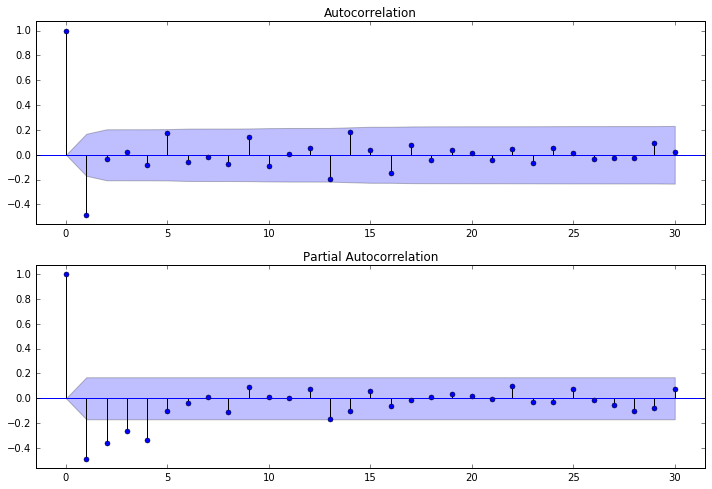

In [140]:
#Sound 3 figures

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sound_data.sound3, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sound_data.sound3, lags=30, ax=ax2)

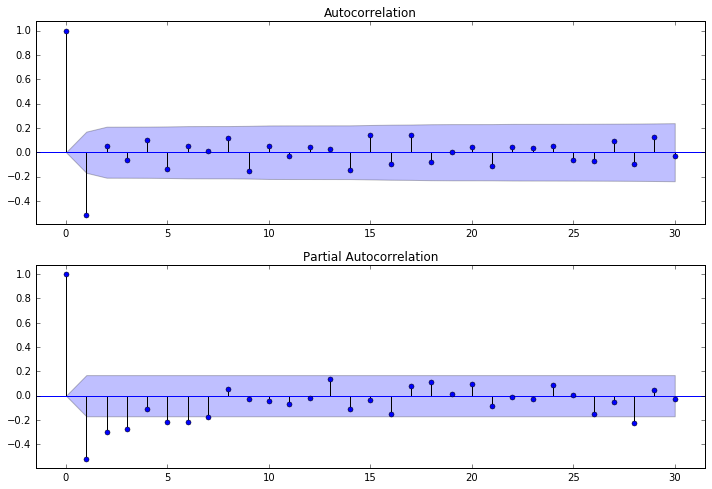

In [141]:
#Sound 4 figures

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sound_data.sound4, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sound_data.sound4, lags=30, ax=ax2)

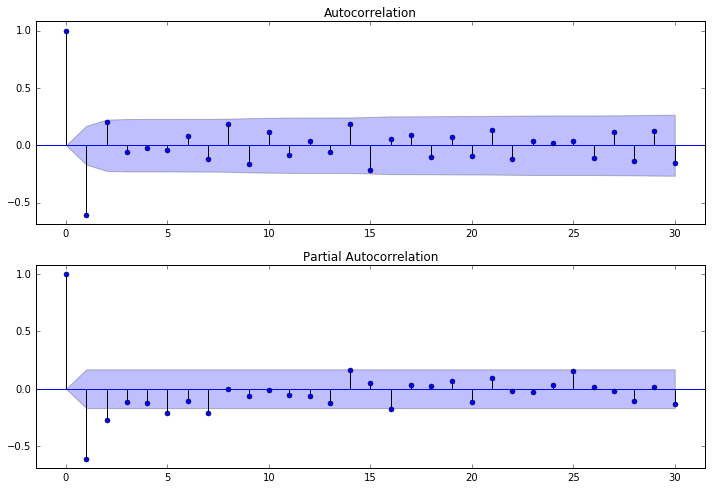

In [142]:
#Sound 5 figures

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sound_data.sound5, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sound_data.sound5, lags=30, ax=ax2)

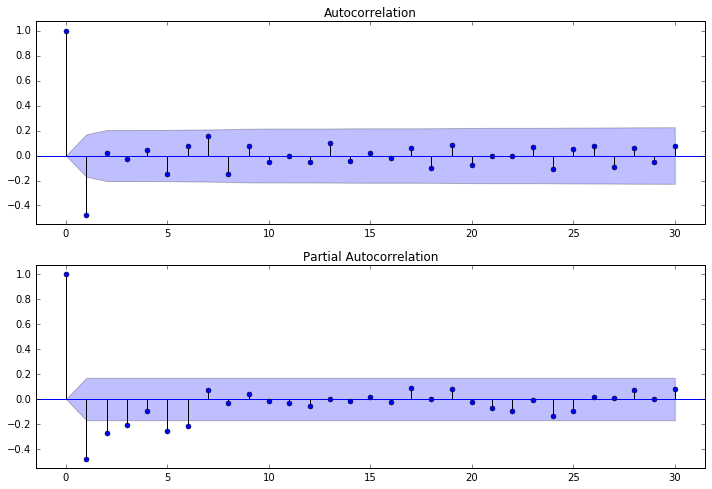

In [143]:
#Soft Sound figures

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sound_data.soft_sound, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sound_data.soft_sound, lags=30, ax=ax2)

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(your_data, lags):
   fig = plt.figure(figsize=(12,8))
   ax1 = fig.add_subplot(211)
   fig = plot_acf(your_data, lags=lags, ax=ax1)
   ax2 = fig.add_subplot(212)
   fig = plot_pacf(your_data, lags=lags, ax=ax2)
   plt.show()

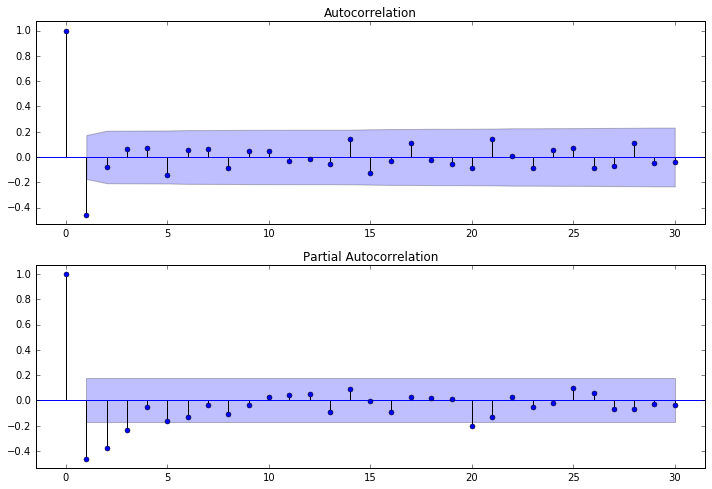

In [74]:
plot_acf_pacf(sound_data.sound1, 30)

In [111]:
soft_model = SARIMAX(sound_data.soft_sound, order=(1,1,1)).fit()

In [80]:
soft_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:             soft_sound   No. Observations:                  127
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -109.304
Date:                Wed, 22 Jun 2016   AIC                            224.609
Time:                        20:22:24   BIC                            233.142
Sample:                    01-31-1881   HQIC                           228.076
                         - 01-31-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5329      0.075     -7.095      0.000      -0.680      -0.386
ma.L1         -0.9998      5.683     -0.176      0.860     -12.138      10.138
sigma2         0.3165      1.808      0.175      0.861      -3.227       3.860
===================================================================================
Ljung-Box (Q):                       73.12   Jarque-Bera (JB):                 7.77
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               1.41   Skew:                             0.46
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
from scipy.optimize import brute

exog = sound_data.soft_sound
endog = sound_data.index

def objfunc(order, exog, endog):
    fit = SARIMAX(endog, order, exog).fit()
    return fit.aic()

grid = (slice(1, 3, 1), slice(1, 3, 1), slice(1, 3, 1))


In [109]:
brute(sm.tsa.statespace.sarimax.SARIMAX, (slice(1, 3, 1), slice(1, 3, 1), slice(1, 3, 1)), finish=None)

array([ 1.,  1.,  2.])

In [112]:
sound_data.soft_sound.ewm(halflife=8)

EWM [com=11.048779707,min_periods=0,adjust=True,ignore_na=False,axis=0]

In [121]:
def plot_sounds(series):
    fig = plt.figure(figsize=(8,6))
    plt.plot(series)

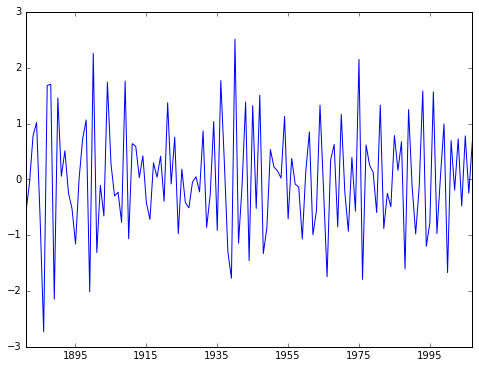

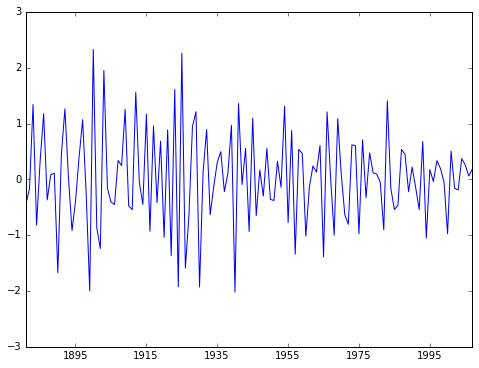

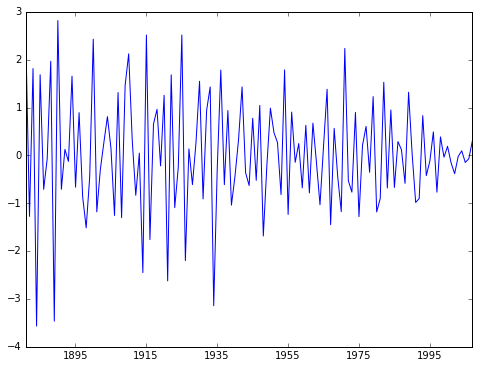

In [123]:
plot_sounds(sound_data.sound1),
plot_sounds(sound_data.sound2),
plot_sounds(sound_data.sound3)